In [1]:
import qdpm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exp_drive_on = qdpm.Experiment(r'O:\68707\BF2222\LABVIEWdata\Cooldown20210114\Heterodyne\Nb_SWIPHT_MB_W8_180nm\SWIPHT RabiAmp tune_up\2021_02_01_18_39_56_on')
exp_drive_off = qdpm.Experiment(r'O:\68707\BF2222\LABVIEWdata\Cooldown20210114\Heterodyne\Nb_SWIPHT_MB_W8_180nm\SWIPHT RabiAmp tune_up\2021_02_01_18_45_03_off')

In [3]:
amp = np.linspace(0, 0.4, exp_drive_on.scan_size[0]-2)

In [4]:
clf_on_Q1 = qdpm.SingleQubitClassifier(exp_drive_on, qubit=0)
prediction_on_Q1 = clf_on_Q1.predict()
population_on_Q1 = prediction_on_Q1.mean(axis=1)

In [5]:
clf_on_Q2 = qdpm.SingleQubitClassifier(exp_drive_on, qubit=1)
prediction_on_Q2 = clf_on_Q2.predict()
population_on_Q2 = prediction_on_Q2.mean(axis=1)

In [6]:
clf_off_Q1 = qdpm.SingleQubitClassifier(exp_drive_off, qubit=0)
prediction_off_Q1 = clf_off_Q1.predict()
population_off_Q1 = prediction_off_Q1.mean(axis=1)

In [7]:
clf_off_Q2 = qdpm.SingleQubitClassifier(exp_drive_off, qubit=1)
prediction_off_Q2 = clf_off_Q2.predict()
population_off_Q2 = prediction_off_Q2.mean(axis=1)

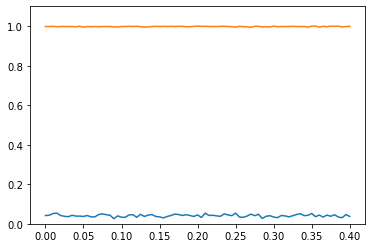

In [8]:
fig_q1, ax_q1 = plt.subplots()
ax_q1.plot(amp, population_on_Q1[2:])
ax_q1.plot(amp, population_off_Q1[2:])
ax_q1.set_ylim(0, 1.1)
plt.show()

In [9]:
max_index = np.argmax(population_off_Q2[2:]-population_on_Q2[2:])

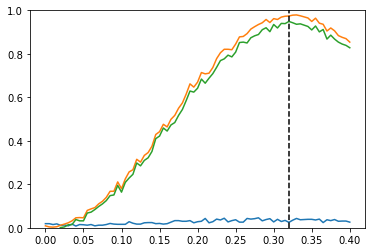

In [10]:
fig_q2, ax_q2 = plt.subplots()
ax_q2.plot(amp, population_on_Q2[2:])
ax_q2.plot(amp, population_off_Q2[2:])
ax_q2.plot(amp, population_off_Q2[2:]-population_on_Q2[2:])
ax_q2.axvline(x=amp[max_index], color='k', linestyle='--')
ax_q2.set_ylim(0, 1)
plt.show()

In [11]:
amp[max_index]

0.32